<a href="https://colab.research.google.com/github/MariaEspFon/Scripts-propios/blob/main/TensorFlow/CNN_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MODELOS CNN

## 1. Inicialización de Keras y TensorFlow

In [7]:
%tensorflow_version 2.x
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

print("TensorFlow version: ", tf.__version__)

from tensorflow import keras
#print("Keras version: ", tf.keras.__version__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import ceil

%reload_ext tensorboard

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version:  2.18.0


## 2. Carga de datos EDA desde Github

In [12]:
x = input('Código del dataset: ')
if x == '7':
  url = 'https://raw.githubusercontent.com/MariaEspFon/Scripts-propios/main/MATLAB/EDA_D7.1_EMA.csv'
  column_names = ['Mean','Median', 'Standard Dev', 'Max Value', 'Min Value', 'Standard Dev 1st diff', 'Median 1st diff', 'Standard Dev 2nd diff',
                  'Total Area', 'Kurtosis', 'SCR','Power', '99% Bandwidth', 'Top Bandwidth Frequency',
                  'Phasic mean', 'Phasic Stdev', 'Phasic AuC', 'Tonic mean', 'Tonic Stdev', 'Tonic AuC',
                'State']
elif x=='1':
  url = 'https://raw.githubusercontent.com/MariaEspFon/Scripts-propios/main/MATLAB/EDA_D1.csv'
  column_names = ['Median', 'Standard Dev', 'Max Value', 'Min Value', 'Total Area', 'nº SCR', 'Power', 'State']
elif x=='2.1':
  url = 'https://raw.githubusercontent.com/MariaEspFon/Scripts-propios/main/MATLAB/EDA_D21.csv'
  column_names = ['Median', 'Standard Dev', 'Max Value', 'Min Value', 'Standard Dev 1st diff','Median 1st diff', #'Standard Dev 2nd diff',
                'Total Area', 'nº SCR', 'Power', 'State']
elif x=='2.2':
  url = 'https://raw.githubusercontent.com/MariaEspFon/Scripts-propios/main/MATLAB/EDA_D22.csv'
  column_names = ['Median', 'Standard Dev', 'Max Value', 'Min Value', 'Standard Dev 1st diff', 'Median 1st diff',
                'nº SCR', 'Total Area', 'Power', 'State']
elif x=='3':
  url = 'https://raw.githubusercontent.com/MariaEspFon/Scripts-propios/main/MATLAB/EDA_D3.csv'
  column_names = ['Median', 'Standard Dev', 'Max Value', 'Min Value', 'Standard Dev 1st diff', 'Median 1st diff', #'Standard Dev 2nd diff',
                'Total Area', 'nº SCR', 'State']
elif x=='4':
  url = 'https://raw.githubusercontent.com/MariaEspFon/Scripts-propios/main/MATLAB/EDA_D4.csv'
  column_names = ['Median', 'Standard Dev', 'Max Value', 'Min Value', 'Standard Dev 1st diff', 'Median 1st diff',
                'Total Area', 'Power', 'State']
elif x=='5':
  url = 'https://raw.githubusercontent.com/MariaEspFon/Scripts-propios/main/MATLAB/EDA_D5.csv'
  column_names = ['Mean', 'Median', 'Standard Dev', 'Max Value', 'Min Value',
                'Standard Dev 1st diff','Median 1st diff', 'Standard Dev 2nd diff',
                'Total Area', 'Kurtosis', 'Power', '99% Bandwidth', 'Top Bandwidth Frequency','State']
elif x=='6':
  url = 'https://raw.githubusercontent.com/MariaEspFon/Scripts-propios/main/MATLAB/EDA_D6.csv'
  column_names = ['Mean','Median', 'Standard Dev', 'Max Value', 'Min Value',
                'Standard Dev 1st diff', 'Median 1st diff', 'Standard Dev 2nd diff',
                'Kurtosis', '99% Bandwidth', 'Top Bandwidth Frequency','State']
else: print('Error: ingrese un código válido')

Código del dataset: 7


In [13]:
raw_dataset = pd.read_csv(url, names=column_names, sep=',', skipinitialspace=True)
clean_dataset = raw_dataset.dropna()

size = clean_dataset.shape
print(f'Formato del dataset: {size}')

class_counts = clean_dataset['State'].value_counts()
print("Recuento de instancias por clase:")
print(class_counts)

HTTPError: HTTP Error 404: Not Found

In [ ]:
clean_dataset.head()  # muestra las primeras 5 filas por defecto

In [ ]:
clean_dataset.tail() # muestra las últimas 5 filas por defecto

## 3. Preprocesamiento de datos

### 3.1. Extracción de los conjuntos de entrenamiento, prueba y validación

*   Datos de **entrenamiento**: para el aprendizaje de parámetros.
*   Datos de **prueba**: para hacer test de predicciones.
*   Datos de **validación**: para afinar hiperparámetros.



In [23]:
# Extracción de subconjuntos: bloque de código para mantener la proporción de clases
from sklearn.model_selection import train_test_split

features = clean_dataset.drop('State', axis=1)
labels = clean_dataset['State']
train_dataset, test_dataset, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=0)

In [24]:
train_size = train_dataset.shape
test_size = test_dataset.shape
print(f'Formato del dataset de training: {train_size}')
print(f'Formato del dataset de test: {test_size}')

train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

Formato del dataset de training: (3576, 20)
Formato del dataset de test: (895, 20)


,count,mean,std,min,25%,50%,75%,max
Mean,3576.0,1.344283,2.486809,2.837595e-04,0.235626,0.420386,1.018402,16.584792
Median,3576.0,1.347576,2.502958,1.507318e-16,0.234684,0.420156,1.015974,17.078574
Standard Dev,3576.0,0.139490,0.362938,3.715939e-04,0.005894,0.028616,0.112155,6.557046
Max Value,3576.0,1.589539,2.759773,3.862719e-03,0.289417,0.487698,1.344151,19.922996
Min Value,3576.0,1.073124,2.277522,-3.023070e-01,0.094649,0.294296,0.662812,16.049411
Standard Dev 1st diff,3576.0,0.022213,0.042807,2.152890e-04,0.001014,0.005374,0.022249,0.798314
Median 1st diff,3576.0,-0.000686,0.003735,-1.354304e-01,-0.000516,-0.000053,0.000056,0.036675
Standard Dev 2nd diff,3576.0,0.010437,0.019055,1.297775e-04,0.000576,0.002739,0.011228,0.380591
Total Area,3576.0,159.971009,295.963119,3.286816e-02,28.023783,50.010245,121.143400,1981.662176
Kurtosis,3576.0,4.971038,5.430407,1.026555e+00,2.112806,2.948435,5.463178,113.812119


### 3.2. Normalización y estandarización de todos los datos

### a) Escalado z-norm
Es sensible a los outliers, puesto que para escalar cada característica utiliza la media y la desviación típica del conjunto total de sus valores

In [25]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
train_size = normed_train_data.shape
test_size = normed_test_data.shape
print(f'Formato del dataset de training: {train_size}')
print(f'Formato del dataset de test: {test_size}')

normed_train_stats = normed_train_data.describe()
normed_train_stats = normed_train_stats.transpose()
normed_train_stats

Formato del dataset de training: (3576, 20)
Formato del dataset de test: (895, 20)


,count,mean,std,min,25%,50%,75%,max
Mean,3576.0,7.947905e-18,1.0,-0.540451,-0.445815,-0.371519,-0.131044,6.128540
Median,3576.0,-1.172316e-16,1.0,-0.538394,-0.444631,-0.370530,-0.132484,6.284963
Standard Dev,3576.0,4.967441e-18,1.0,-0.383311,-0.368094,-0.305490,-0.075315,17.682257
Max Value,3576.0,-3.973953e-17,1.0,-0.574568,-0.471097,-0.399251,-0.088916,6.643102
Min Value,3576.0,2.086325e-17,1.0,-0.603916,-0.429623,-0.341963,-0.180157,6.575694
Standard Dev 1st diff,3576.0,-8.345301e-17,1.0,-0.513886,-0.495218,-0.393376,0.000846,18.130420
Median 1st diff,3576.0,0.000000e+00,1.0,-36.078873,0.045384,0.169392,0.198762,10.003738
Standard Dev 2nd diff,3576.0,2.185674e-17,1.0,-0.540907,-0.517504,-0.403980,0.041537,19.425773
Total Area,3576.0,3.775255e-17,1.0,-0.540399,-0.445823,-0.371535,-0.131191,6.155129
Kurtosis,3576.0,1.390883e-17,1.0,-0.726370,-0.526339,-0.372459,0.090627,20.042895


### b) Escalado Robust Scaler
No es sensible a outliers, porque para normalizar cada característica utiliza la media y el rango intercuartílico (IQR)

In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

normed_train_data = scaler.fit_transform(train_dataset)
normed_test_data = scaler.transform(test_dataset)
# solo se ajusta con el modelo de entrenamiento para evitar el data leakage.
normed_train_df = pd.DataFrame(normed_train_data, columns=train_dataset.columns)

print(f'Formato del dataset de training: {train_size}')
print(f'Formato del dataset de test: {test_size}')
normed_train_stats = normed_train_df.describe()
normed_train_stats = normed_train_stats.transpose()
normed_train_stats

Formato del dataset de training: (3159, 20)
Formato del dataset de test: (790, 20)


,count,mean,std,min,25%,50%,75%,max
Mean,3159.0,1.178948,3.084869,-0.497625,-0.212194,0.0,0.787806,18.865770
Median,3159.0,1.170616,3.065592,-0.488191,-0.215034,0.0,0.784966,18.807037
Standard Dev,3159.0,1.041676,3.285120,-0.203745,-0.163954,0.0,0.836046,55.912407
Max Value,3159.0,0.997330,2.431211,-0.406594,-0.167801,0.0,0.832199,14.107580
Min Value,3159.0,1.687773,4.740424,-0.604176,-0.335296,0.0,0.664704,30.302106
Standard Dev 1st diff,3159.0,0.775497,1.803963,-0.212805,-0.171807,0.0,0.828193,21.306174
Median 1st diff,3159.0,-0.575734,7.752755,-216.086924,-0.645326,0.0,0.354674,96.918492
Standard Dev 2nd diff,3159.0,0.725680,1.547372,-0.205207,-0.139148,0.0,0.860852,13.174984
Total Area,3159.0,1.175849,3.077090,-0.496330,-0.211945,0.0,0.788055,18.867656
Kurtosis,3159.0,0.784879,2.152044,-0.524840,-0.227992,0.0,0.772008,32.369991


## 4. Creación del modelo CNN

El primer modelo cuenta con 2 tipos de capas:
*     Capas convolucionales con un número variable de filtros de (2x1) o (3x1).
*     Capas densas en la salida para integrar toda la información convolucional y hacer la clasificación binaria (para la cual sólo es necesaria una neurona y una función sigmoid de activación).

Además, se incluye una capa accesoria para preparar los datos antes de la capa de salida (capa Flatten)

In [8]:
from keras import Sequential, layers, activations

### 4.1 Modelos A y B

In [ ]:
def build_model_A(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='same', activation='relu', input_shape=(size[1],1)))
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
   # compilación del modelo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_A(train_size)
model.summary()

In [ ]:
def build_model_B(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='same', activation='relu', input_shape=(size[1],1)))
  model.add(layers.Conv1D(22, 3, padding='same'))
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
   # compilación del modelo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_B(train_size)
model.summary()

### 4.2 Modelos C

In [26]:
def build_model_C1(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='same', activation='relu', input_shape=(size[1],1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(22, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(18, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
   # compilación del modelo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_C1(train_size)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 20, 27)         │            81 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 20, 27)         │           108 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 20, 22)         │         1,804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 20, 22)         │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 20, 18)         │         1,206 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 20, 18)         │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 360)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 22)             │         7,942 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,324 (44.23 KB)

 Trainable params: 11,190 (43.71 KB)

 Non-trainable params: 134 (536.00 B)

In [ ]:
def build_model_C2(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='same', activation='relu', input_shape=(size[1],1)))
  model.add(layers.Conv1D(22, 3, padding='same', activation='relu'))
  model.add(layers.Conv1D(18, 3, padding='same', activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
   # compilación del modelo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_C2(train_size)
model.summary()

In [38]:
def build_model_C3(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='same', activation='relu', input_shape=(size[1],1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(22, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(18, 4, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
   # compilación del modelo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_C3(train_size)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 20, 27)         │            81 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 20, 27)         │           108 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 20, 22)         │         1,804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 20, 22)         │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 20, 18)         │         1,602 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 20, 18)         │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 360)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 22)             │         7,942 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,720 (45.78 KB)

 Trainable params: 11,586 (45.26 KB)

 Non-trainable params: 134 (536.00 B)

In [ ]:
def build_model_C4(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='same', activation='relu', input_shape=(size[1],1)))
  model.add(layers.Conv1D(22, 3, padding='same', activation='relu'))
  model.add(layers.Conv1D(18, 4, padding='same', activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
   # compilación del modelo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_C4(train_size)
model.summary()

### 4.3 Modelos D

In [16]:
def build_model_D1(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='same', activation='relu', input_shape=(size[1],1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(22, 3, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(18, 4, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(9, 5, padding='same', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
   # compilación del modelo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_D1(train_size)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 20, 27)         │            81 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20, 27)         │           108 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 20, 22)         │         1,804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 22)         │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 20, 18)         │         1,602 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20, 18)         │            72 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 20, 9)          │           819 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 20, 9)          │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │         3,982 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            23 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,615 (33.65 KB)

 Trainable params: 8,463 (33.06 KB)

 Non-trainable params: 152 (608.00 B)

In [ ]:
def build_model_D2(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='valid', activation='relu', input_shape=(size[1],1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(22, 3, padding='valid', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(18, 4, padding='valid', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv1D(9, 5, padding='valid', activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
   # compilación del modelo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_D2(train_size)
model.summary()

In [ ]:
def build_model_D3(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='same', input_shape=(size[1],1)))
  model.add(layers.ELU(alpha=1.0))
  model.add(layers.Conv1D(22, 3, padding='same'))
  model.add(layers.ELU(alpha=1.0))
  model.add(layers.Conv1D(18, 4, padding='same'))
  model.add(layers.ELU(alpha=1.0))
  model.add(layers.Conv1D(9, 5, padding='same'))
  model.add(layers.ELU(alpha=1.0))
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  # compilación del modeo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_D3(train_size)
model.summary()

In [ ]:
def build_model_D4(size):
  model = Sequential()
  model.add(layers.Conv1D(27, 2, strides=1, padding='valid', input_shape=(size[1],1)))
  model.add(layers.ELU(alpha=1.0))
  model.add(layers.Conv1D(22, 3, padding='valid'))
  model.add(layers.ELU(alpha=1.0))
  model.add(layers.Conv1D(18, 4, padding='valid'))
  model.add(layers.ELU(alpha=1.0))
  model.add(layers.Conv1D(9, 5, padding='valid'))
  model.add(layers.ELU(alpha=1.0))
  model.add(layers.Flatten())
  model.add(layers.Dense(22, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  # compilación del modeo
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_accuracy','precision','recall',keras.metrics.F1Score()])
  return model

model = build_model_D4(train_size)
model.summary()

## 5. Entrenamiento del modelo

Reservamos el 20% de los datos de entrenamiento para la validación del modelo

In [ ]:
from keras import callbacks
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # o 'val_accuracy'
    patience=100,              # número de épocas que espera sin mejora
    restore_best_weights=True  # para recuperar los mejores pesos
)

In [39]:
EPOCHS = 1000
#BATCH_SIZE = train_size[0]
BATCH_SIZE = ceil(train_size[0]*0.1)
print(BATCH_SIZE)
history = model.fit(normed_train_data, train_labels, batch_size=BATCH_SIZE,
                    epochs=EPOCHS, validation_split = 0.2, verbose=0)

358


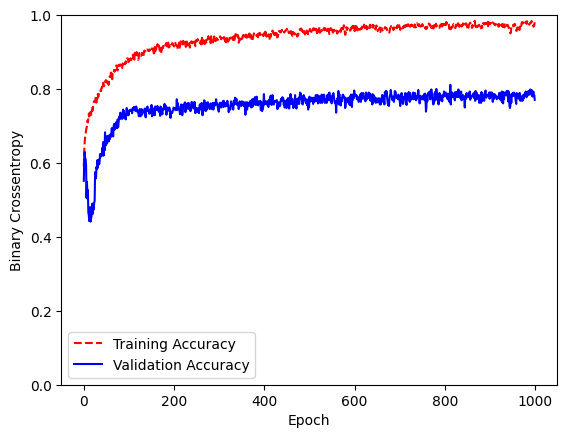

In [40]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.plot(hist['epoch'], hist['binary_accuracy'],'r--',
           label='Training Accuracy')
  plt.plot(hist['epoch'], hist['val_binary_accuracy'],'b',
           label = 'Validation Accuracy')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

plot_history(history)

## 6. Validación del modelo con los datos de test


In [41]:
test_loss, test_acc, test_precision, test_recall, test_f1 = model.evaluate(normed_test_data, test_labels, batch_size=(test_size[0]))
print(f'Test accuracy: {100*test_acc:.2f}%')
print(f'Test loss: {test_loss:.3f}')
# TensorFlow imprime las métricas en orden alfabético por defecto en la consola,
# pero el método evaluate() devuelve los valores en el mismo orden en que fueron definidos en model.compile().

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step - binary_accuracy: 0.7754 - f1_score: 0.7748 - loss: 1.4630 - precision: 0.8160 - recall: 0.8175
Test accuracy: 77.54%
Test loss: 1.463


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


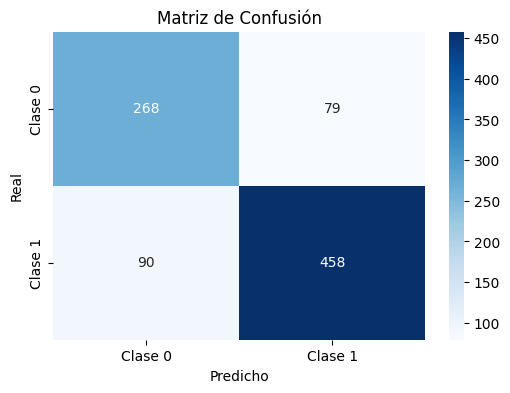

Reporte de clasificación:
              precision    recall  f1-score   support

     Clase 0       0.75      0.77      0.76       347
     Clase 1       0.85      0.84      0.84       548

    accuracy                           0.81       895
   macro avg       0.80      0.80      0.80       895
weighted avg       0.81      0.81      0.81       895



In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

predictions = model.predict(normed_test_data)
predicted_labels = (predictions > 0.5).astype(int)
cm = confusion_matrix(test_labels, predicted_labels)

# Muestra la matriz de confusión
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')
    plt.show()

plot_confusion_matrix(cm)

# Muestra métricas adicionales
print("Reporte de clasificación:")
print(classification_report(test_labels, predicted_labels, target_names=['Clase 0', 'Clase 1']))
